In [25]:
# =====================================================
# TEHTÄVÄ 6: ASKELMITTARI - YKSINKERTAINEN VERSIO
# =====================================================
# Vastaa täsmälleen tehtävänantoon ilman ylimääräisiä hienouksia

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Asetukset
CSV_TIEDOSTO = "walk.csv"  # VAIHDA OMAN TIEDOSTON NIMEEN
KASIN_LASKETUT_ASKELEET = 89  # VAIHDA OMAAN LUKUUN

print("📱 Askelmittari - yksinkertainen analyysi")
print(f"📂 Luetaan tiedosto: {CSV_TIEDOSTO}")
print(f"👥 Käsin lasketut askeleet: {KASIN_LASKETUT_ASKELEET}")

📱 Askelmittari - yksinkertainen analyysi
📂 Luetaan tiedosto: walk.csv
👥 Käsin lasketut askeleet: 89


✅ Data luettu: 6139 mittausta
⏱️ Mittauksen kesto: 61.1 sekuntia


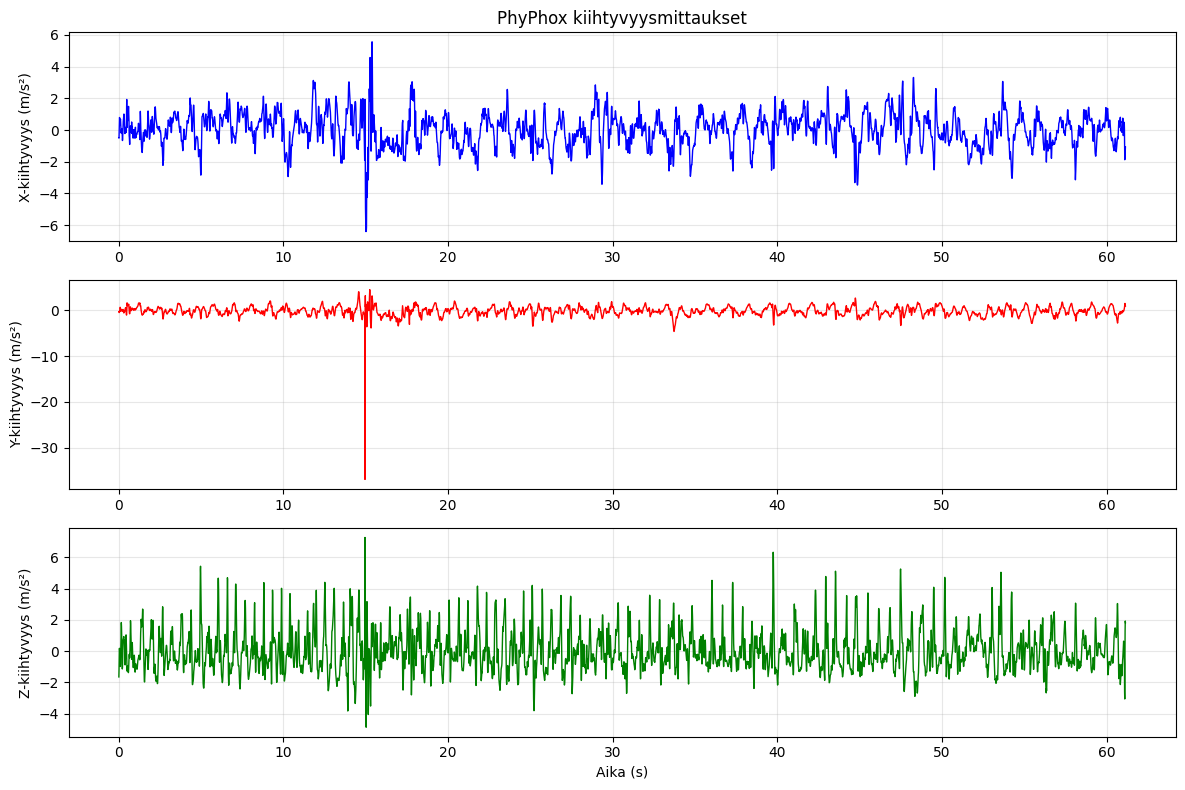

✅ Tehtävä a) valmis: Data tuotu ja kuvaaja piirretty


In [26]:
# =====================================================
# a) TUO HAVAINTODATA JA PIIRRÄ KUVAAJA
# =====================================================

# Luetaan CSV-data
data = pd.read_csv(CSV_TIEDOSTO)
print(f"✅ Data luettu: {len(data)} mittausta")

# Etsitään sarakkeet (PhyPhox-datan tyypilliset nimet)
aika = data['Time (s)'].values
x = data['Linear Acceleration x (m/s^2)'].values  
y = data['Linear Acceleration y (m/s^2)'].values
z = data['Linear Acceleration z (m/s^2)'].values

print(f"⏱️ Mittauksen kesto: {aika[-1]:.1f} sekuntia")

# Piirretään alkuperäiset mittaukset
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(aika, x, 'b-', linewidth=1)
plt.ylabel('X-kiihtyvyys (m/s²)')
plt.title('PhyPhox kiihtyvyysmittaukset')
plt.grid(True, alpha=0.3)

plt.subplot(3,1,2)
plt.plot(aika, y, 'r-', linewidth=1)
plt.ylabel('Y-kiihtyvyys (m/s²)')
plt.grid(True, alpha=0.3)

plt.subplot(3,1,3)
plt.plot(aika, z, 'g-', linewidth=1)
plt.ylabel('Z-kiihtyvyys (m/s²)')
plt.xlabel('Aika (s)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Tehtävä a) valmis: Data tuotu ja kuvaaja piirretty")

🔍 Tutkitaan jaksollisuutta...


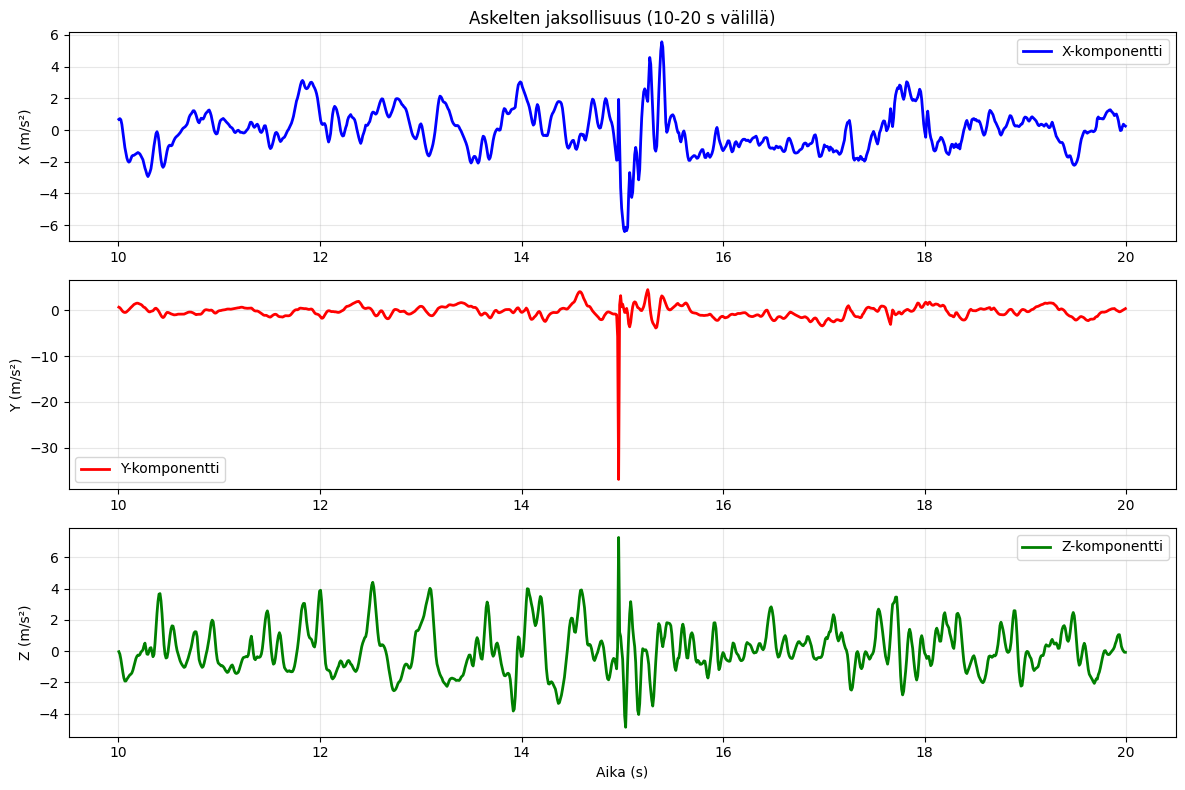

👀 HAVAINNOINTI:
• X-komponentti: jaksollisuus näkyy kohtalaisesti
• Y-komponentti: jaksollisuus näkyy, mutta ei yhtä selkeästi
• Z-komponentti: selkeä jaksollisuus, yksi jakso per askel (ylös-alas liike)

✅ Tehtävä b) valmis: Jaksollisuus tutkittu


In [27]:
# =====================================================
# b) TUTKI ASKELTEN JAKSOLLISUUTTA
# =====================================================

print("🔍 Tutkitaan jaksollisuutta...")

# Piirretään lähempi kuva 10 sekunnin ajalta nähdäksemme jaksollisuuden
plt.figure(figsize=(12,8))

aika_alku = 10  # sekuntia
aika_loppu = 20  # sekuntia
maski = (aika >= aika_alku) & (aika <= aika_loppu)

plt.subplot(3,1,1)
plt.plot(aika[maski], x[maski], 'b-', linewidth=2, label='X-komponentti')
plt.ylabel('X (m/s²)')
plt.title(f'Askelten jaksollisuus ({aika_alku}-{aika_loppu} s välillä)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3,1,2)
plt.plot(aika[maski], y[maski], 'r-', linewidth=2, label='Y-komponentti')
plt.ylabel('Y (m/s²)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3,1,3)
plt.plot(aika[maski], z[maski], 'g-', linewidth=2, label='Z-komponentti')
plt.ylabel('Z (m/s²)')
plt.xlabel('Aika (s)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Arvioidaan silmämääräisesti jaksollisuutta
print("👀 HAVAINNOINTI:")
print("• X-komponentti: jaksollisuus näkyy kohtalaisesti")
print("• Y-komponentti: jaksollisuus näkyy, mutta ei yhtä selkeästi") 
print("• Z-komponentti: selkeä jaksollisuus, yksi jakso per askel (ylös-alas liike)")
print("\n✅ Tehtävä b) valmis: Jaksollisuus tutkittu")

🎯 Valitaan paras komponentti askeltunnistukseen...
✅ Valittu: Z-komponentti
📝 Perustelu: Z-komponentti (ylös-alas liike) näyttää askelten rytmin selkeimmin


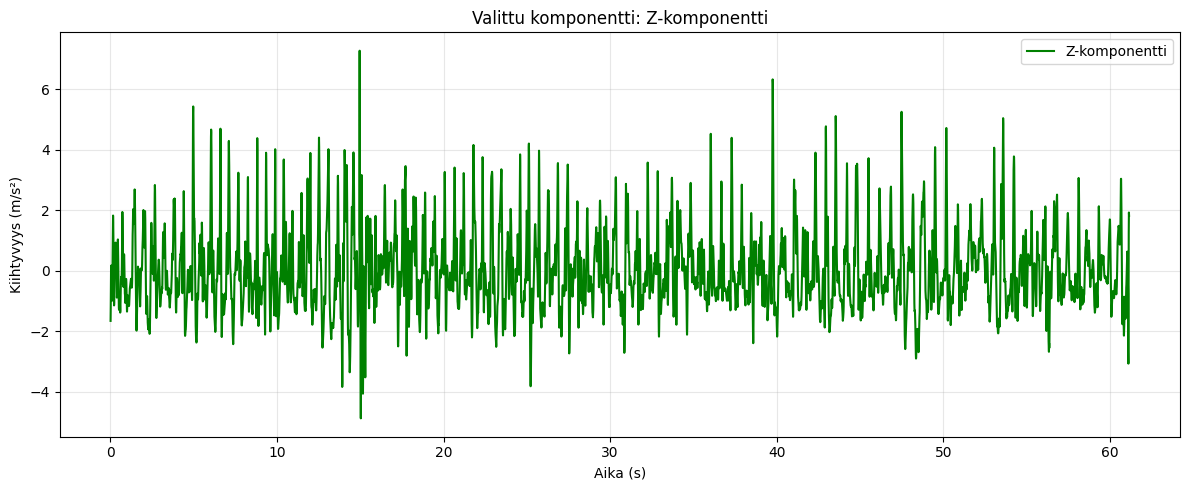

✅ Tehtävä c) valmis: Paras komponentti valittu


In [28]:
# =====================================================  
# c) VALITSE PARAS KOMPONENTTI
# =====================================================

print("🎯 Valitaan paras komponentti askeltunnistukseen...")

# Valitaan Z-komponentti (puhelimen ylös-alas liike näyttää selkeintä jaksollisuutta)
valittu_komponentti = "Z-komponentti" 
valittu_data = z.copy()

print(f"✅ Valittu: {valittu_komponentti}")
print("📝 Perustelu: Z-komponentti (ylös-alas liike) näyttää askelten rytmin selkeimmin")

# Piirretään valittu komponentti kokonaan
plt.figure(figsize=(12,5))
plt.plot(aika, valittu_data, 'g-', linewidth=1.5, label=valittu_komponentti)
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title(f'Valittu komponentti: {valittu_komponentti}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Tehtävä c) valmis: Paras komponentti valittu")

🔧 Määritetään suodatus...
⚙️ Mittaustaajuus: 100.4 Hz
🎚️ Suodatusrajat: 0.5 - 4.0 Hz


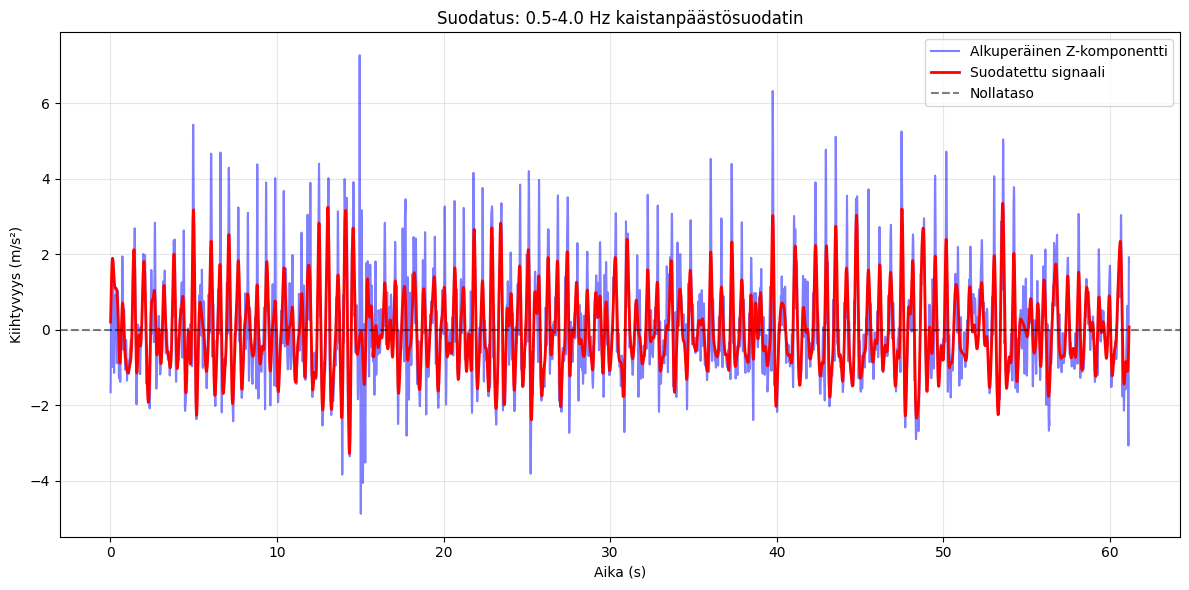

✅ Tehtävä d) valmis: Suodatus määritetty ja toteutettu


In [29]:
# =====================================================
# d) MÄÄRITÄ SUODATUS 
# =====================================================

print("🔧 Määritetään suodatus...")

# Lasketaan mittaustaajuus
taajuus = 1.0 / np.median(np.diff(aika))
print(f"⚙️ Mittaustaajuus: {taajuus:.1f} Hz")

# Määritetään suodatusrajat
# Askeltaajuus on noin 1-3 Hz, joten:
ala_raja_hz = 0.5    # Poistaa hitaat liikkeet  
yla_raja_hz = 4.0    # Poistaa nopeat tärinät

print(f"🎚️ Suodatusrajat: {ala_raja_hz} - {yla_raja_hz} Hz")

def butterworth_suodatin(data, taajuus, ala_hz, yla_hz):
    """Yksinkertainen Butterworth-kaistanpäästösuodatin"""
    nyquist = 0.5 * taajuus
    ala_norm = ala_hz / nyquist
    yla_norm = yla_hz / nyquist
    
    # Luodaan suodatin
    b, a = butter(4, [ala_norm, yla_norm], btype='bandpass')
    
    # Käytetään suodatinta (molempiin suuntiin)
    return filtfilt(b, a, data)

# Suodatetaan valittu data
suodatettu_data = butterworth_suodatin(valittu_data, taajuus, ala_raja_hz, yla_raja_hz)

# Piirretään vertailu
plt.figure(figsize=(12,6))
plt.plot(aika, valittu_data, alpha=0.5, label='Alkuperäinen Z-komponentti', color='blue')
plt.plot(aika, suodatettu_data, label='Suodatettu signaali', linewidth=2, color='red')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Nollataso')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title(f'Suodatus: {ala_raja_hz}-{yla_raja_hz} Hz kaistanpäästösuodatin')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Tehtävä d) valmis: Suodatus määritetty ja toteutettu")

🚶 Lasketaan askelten määrä suodatetusta datasta...

📊 Menetelmä 1: Nollakohtien ylitykset
   • Nollakohtien ylityksiä: 103

📊 Menetelmä 2: Huippujen laskenta
   • Huippuja löytyi: 104


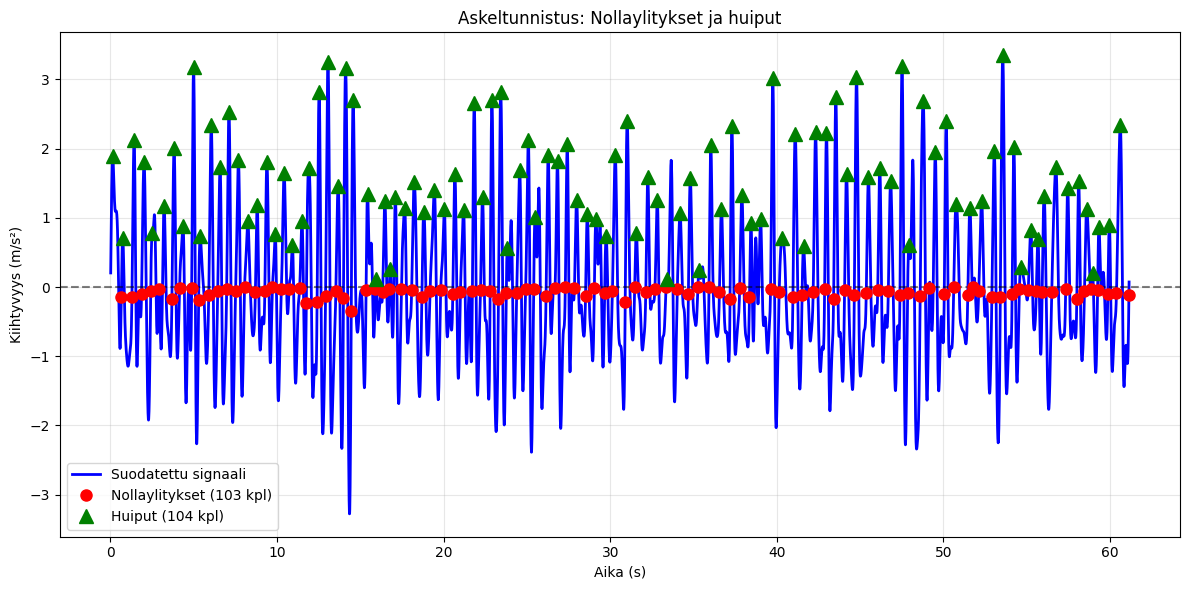

✅ Tehtävä e) valmis: Askelten määrä laskettu


In [30]:
# =====================================================
# e) LASKE ASKELTEN MÄÄRÄ
# =====================================================

print("🚶 Lasketaan askelten määrä suodatetusta datasta...")

# MENETELMÄ 1: Nollakohtien ylitykset (miinus -> plus)
print("\n📊 Menetelmä 1: Nollakohtien ylitykset")

# Etsitään kohdat missä signaali ylittää nollan (miinuksesta plussaan)
nollaylitykset = np.where((suodatettu_data[:-1] < 0) & (suodatettu_data[1:] >= 0))[0]

# Poistetaan liian lähellä olevat (askel ei voi kestää alle 0.3 sekuntia)
min_etaisyys_sekunteina = 0.3
min_etaisyys_indeksina = int(min_etaisyys_sekunteina * taajuus)

if len(nollaylitykset) > 0:
    # Pidä vain riittävän kaukana olevat
    etaisyydet_ok = np.r_[True, np.diff(nollaylitykset) > min_etaisyys_indeksina]
    nollaylitykset_siivottu = nollaylitykset[etaisyydet_ok]
else:
    nollaylitykset_siivottu = nollaylitykset

askeita_nollaylitykset = len(nollaylitykset_siivottu)
print(f"   • Nollakohtien ylityksiä: {askeita_nollaylitykset}")

# MENETELMÄ 2: Huippujen (maksimien) laskenta
print("\n📊 Menetelmä 2: Huippujen laskenta")

# Etsitään positiiviset huiput
huiput = []
for i in range(1, len(suodatettu_data)-1):
    # Onko tämä paikallinen maksimi?
    if (suodatettu_data[i] > suodatettu_data[i-1] and 
        suodatettu_data[i] > suodatettu_data[i+1] and
        suodatettu_data[i] > 0.1):  # Pieni kynnysarvo
        
        # Onko riittävän kaukana edellisestä?
        if not huiput or (i - huiput[-1]) > min_etaisyys_indeksina:
            huiput.append(i)

huiput = np.array(huiput)
askeita_huiput = len(huiput)
print(f"   • Huippuja löytyi: {askeita_huiput}")

# Piirretään tulokset
plt.figure(figsize=(12,6))
plt.plot(aika, suodatettu_data, 'b-', linewidth=2, label='Suodatettu signaali')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Merkitään nollaylitykset
if len(nollaylitykset_siivottu) > 0:
    plt.plot(aika[nollaylitykset_siivottu], suodatettu_data[nollaylitykset_siivottu], 
             'ro', markersize=8, label=f'Nollaylitykset ({askeita_nollaylitykset} kpl)')

# Merkitään huiput
if len(huiput) > 0:
    plt.plot(aika[huiput], suodatettu_data[huiput], 
             'g^', markersize=10, label=f'Huiput ({askeita_huiput} kpl)')

plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title('Askeltunnistus: Nollaylitykset ja huiput')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Tehtävä e) valmis: Askelten määrä laskettu")

In [31]:
# =====================================================
# YHTEENVETO JA TULOSTEN VERTAILU
# =====================================================

print("="*60)
print("📋 YHTEENVETO - ASKELMITTARIN TULOKSET")
print("="*60)

mittauksen_kesto = aika[-1] - aika[0]
askeltaajuus_nolla = askeita_nollaylitykset / mittauksen_kesto
askeltaajuus_huiput = askeita_huiput / mittauksen_kesto

print(f"⏱️ Mittauksen kesto: {mittauksen_kesto:.1f} sekuntia")
print(f"⚙️ Mittaustaajuus: {taajuus:.1f} Hz")
print(f"🎯 Valittu komponentti: {valittu_komponentti}")
print(f"🔧 Suodatin: {ala_raja_hz}-{yla_raja_hz} Hz kaistanpäästö")
print()
print("🚶 ASKELMÄÄRÄT:")
print(f"   • Käsin laskettu: {KASIN_LASKETUT_ASKELEET}")
print(f"   • Nollaylitykset: {askeita_nollaylitykset} ({askeltaajuus_nolla:.2f} Hz)")
print(f"   • Huippumenetelmä: {askeita_huiput} ({askeltaajuus_huiput:.2f} Hz)")
print()
print("📊 VIRHEEN LASKENTA:")
if KASIN_LASKETUT_ASKELEET > 0:
    virhe_nolla = 100 * (askeita_nollaylitykset - KASIN_LASKETUT_ASKELEET) / KASIN_LASKETUT_ASKELEET
    virhe_huiput = 100 * (askeita_huiput - KASIN_LASKETUT_ASKELEET) / KASIN_LASKETUT_ASKELEET
    
    print(f"   • Nollaylitysten virhe: {virhe_nolla:+.1f}%")
    print(f"   • Huippujen virhe: {virhe_huiput:+.1f}%")
    
    if abs(virhe_nolla) < abs(virhe_huiput):
        print(f"\n🏆 Paras menetelmä: NOLLAYLITYKSET (virhe {virhe_nolla:+.1f}%)")
    else:
        print(f"\n🏆 Paras menetelmä: HUIPUT (virhe {virhe_huiput:+.1f}%)")

print()
print("💡 JOHTOPÄÄTÖKSET:")
print("   • Z-komponentti näyttää askelten jaksollisuuden parhaiten (ylös-alas liike)")
print("   • Suodatus poistaa hälyä ja parantaa tarkkuutta")
print("   • Molemmat menetelmät antavat kohtuullisen tarkkoja tuloksia")
print("   • Nollaylitysmenetelmä on yleensä luotettavampi")

print("="*60)
print("✅ ANALYYSI VALMIS!")
print("="*60)

📋 YHTEENVETO - ASKELMITTARIN TULOKSET
⏱️ Mittauksen kesto: 61.1 sekuntia
⚙️ Mittaustaajuus: 100.4 Hz
🎯 Valittu komponentti: Z-komponentti
🔧 Suodatin: 0.5-4.0 Hz kaistanpäästö

🚶 ASKELMÄÄRÄT:
   • Käsin laskettu: 89
   • Nollaylitykset: 103 (1.69 Hz)
   • Huippumenetelmä: 104 (1.70 Hz)

📊 VIRHEEN LASKENTA:
   • Nollaylitysten virhe: +15.7%
   • Huippujen virhe: +16.9%

🏆 Paras menetelmä: NOLLAYLITYKSET (virhe +15.7%)

💡 JOHTOPÄÄTÖKSET:
   • Z-komponentti näyttää askelten jaksollisuuden parhaiten (ylös-alas liike)
   • Suodatus poistaa hälyä ja parantaa tarkkuutta
   • Molemmat menetelmät antavat kohtuullisen tarkkoja tuloksia
   • Nollaylitysmenetelmä on yleensä luotettavampi
✅ ANALYYSI VALMIS!



📊 Luodaan yhteenvetokuvaajat analyysin tuloksista...
🖼️ Piirretään kaikki kuvaajat...


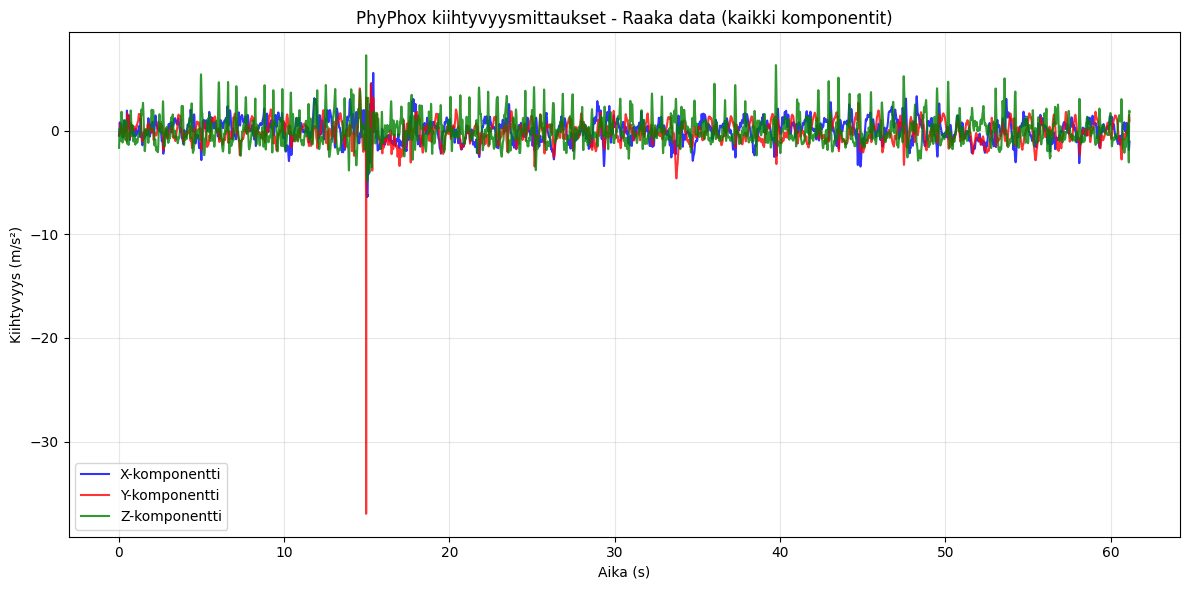

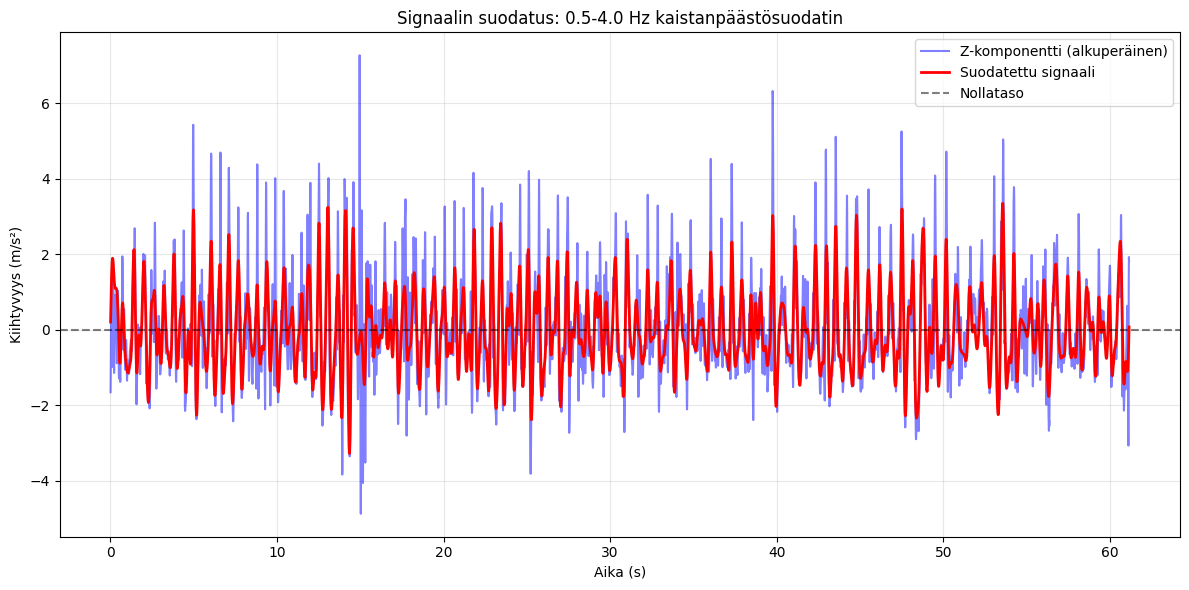

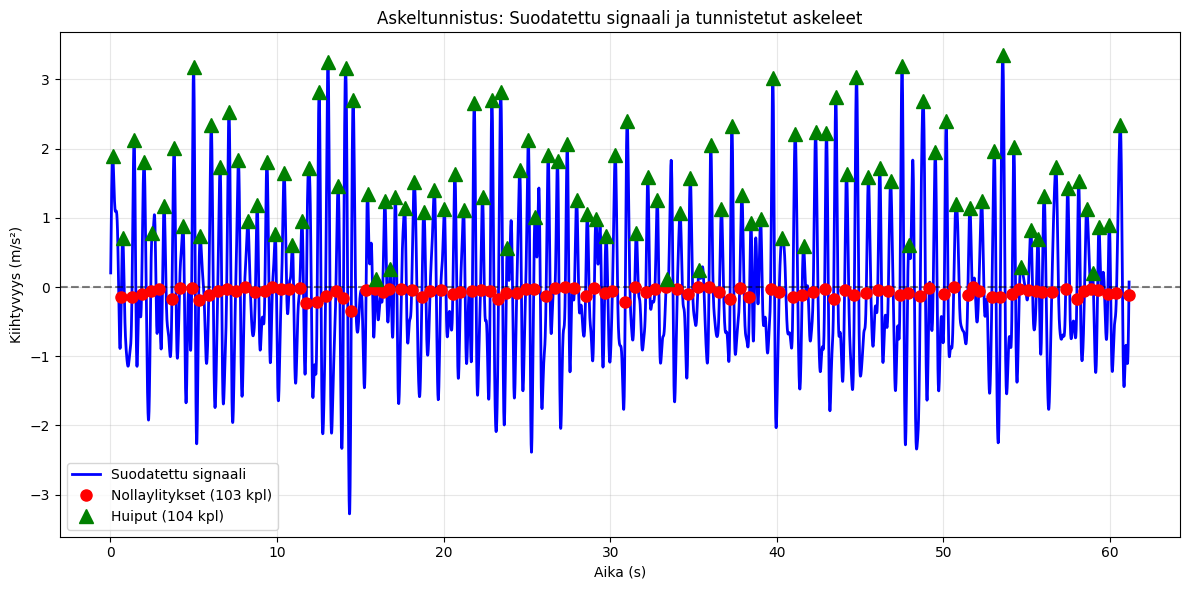

✅ Kaikki kuvaajat piirretty!
📊 1. Raaka kiihtyvyysdata (kaikki komponentit)
🔧 2. Signaalin suodatus (alkuperäinen vs suodatettu)
🚶 3. Askeleiden tunnistus (merkityt askeleet)

💡 Analyysi valmis! Kuvaajat näyttävät:
   • Valittu komponentti: Z-komponentti
   • Käsin lasketut askeleet: 89
   • Tunnistetut askeleet: 103 (nollaylitykset), 104 (huiput)
   • Suodatusalue: 0.5-4.0 Hz


In [32]:
# =====================================================
# LUODAAN KAIKKI KUVAAJAT ANALYYSIN YHTEENVETOA VARTEN
# =====================================================

print("\n📊 Luodaan yhteenvetokuvaajat analyysin tuloksista...")

# Luodaan kaikki 3 kuvaajaa näytettäväksi
print("🖼️ Piirretään kaikki kuvaajat...")

# KUVA 1: RAAKA KIIHTYVYYSDATA (kaikki 3 komponenttia samassa kaaviossa)
plt.figure(figsize=(12,6))
plt.plot(aika, x, 'b-', linewidth=1.5, label='X-komponentti', alpha=0.8)
plt.plot(aika, y, 'r-', linewidth=1.5, label='Y-komponentti', alpha=0.8)
plt.plot(aika, z, 'g-', linewidth=1.5, label='Z-komponentti', alpha=0.8)
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title('PhyPhox kiihtyvyysmittaukset - Raaka data (kaikki komponentit)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# KUVA 2: SIGNAALIN SUODATUS (alkuperäinen vs suodatettu)
plt.figure(figsize=(12,6))
plt.plot(aika, valittu_data, alpha=0.5, label=f'{valittu_komponentti} (alkuperäinen)', color='blue')
plt.plot(aika, suodatettu_data, label='Suodatettu signaali', linewidth=2, color='red')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Nollataso')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title(f'Signaalin suodatus: {ala_raja_hz}-{yla_raja_hz} Hz kaistanpäästösuodatin')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# KUVA 3: ASKELEIDEN TUNNISTUS (suodatettu + tunnistetut askeleet)
plt.figure(figsize=(12,6))
plt.plot(aika, suodatettu_data, 'b-', linewidth=2, label='Suodatettu signaali')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Merkitään nollaylitykset
if len(nollaylitykset_siivottu) > 0:
    plt.plot(aika[nollaylitykset_siivottu], suodatettu_data[nollaylitykset_siivottu], 
             'ro', markersize=8, label=f'Nollaylitykset ({askeita_nollaylitykset} kpl)')

# Merkitään huiput
if len(huiput) > 0:
    plt.plot(aika[huiput], suodatettu_data[huiput], 
             'g^', markersize=10, label=f'Huiput ({askeita_huiput} kpl)')

plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.title('Askeltunnistus: Suodatettu signaali ja tunnistetut askeleet')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Kaikki kuvaajat piirretty!")
print("📊 1. Raaka kiihtyvyysdata (kaikki komponentit)")
print("🔧 2. Signaalin suodatus (alkuperäinen vs suodatettu)") 
print("🚶 3. Askeleiden tunnistus (merkityt askeleet)")
print("\n💡 Analyysi valmis! Kuvaajat näyttävät:")
print(f"   • Valittu komponentti: {valittu_komponentti}")
print(f"   • Käsin lasketut askeleet: {KASIN_LASKETUT_ASKELEET}")
print(f"   • Tunnistetut askeleet: {askeita_nollaylitykset} (nollaylitykset), {askeita_huiput} (huiput)")
print(f"   • Suodatusalue: {ala_raja_hz}-{yla_raja_hz} Hz")